## 1.
Perform pre-processing on the full dataset here: https://www.kaggle.com/sohier/calcofi 

### Here are some pre-processing methods:
* one hot encoding
* standard scaler
* correlation matrix
* removing NaN values, droping columns or rows
* replacing NaN values with mean
* data slustering
* normalizing data with log
* nominal values method -- Label encoding
* integer encoding
* PCA - principal component analysis

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statistics as stats
from scipy import stats

#loading cast dataset
file_to_load = "cast.csv"

# Read Purchasing File and store into Pandas data frame
cast_df = pd.read_csv(file_to_load)

/Users/olesiamukha/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (40,41,44,45,46,47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [20]:
#loading bottle dataset
file_to_load2 = "bottle.csv"

# Read Purchasing File and store into Pandas data frame
bottle_df = pd.read_csv(file_to_load2)

/Users/olesiamukha/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (47,73) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [21]:
#bottle_df

In [22]:
#dropping columns which mostly we'll not use and which have too many null values
bottle_df1 = bottle_df.drop(["DIC1", "DIC2", "TA1", "TA2", "pH2", "pH1", "DIC Quality Comment", "O2ml_L",
                            "O2Sat", "Oxy_µmol/Kg", "BtlNum", "ChlorA", "Phaeop", "PO4uM", "SiO3uM", "NO2uM",
                            "NO3uM", "NH3uM", "C14As1", "C14A1p", "C14As2", "C14A2p", "DarkAs", "DarkAp",
                            "MeanAs", "MeanAp", "IncTim", "LightP", "R_O2", "R_O2Sat", "R_SIO3", "R_PO4", 
                            "R_NO3", "R_NO2", "R_NH4", "R_CHLA", "R_PHAEO", "R_SAMP", ], axis =1)
bottle_df1.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,STheta,RecInd,T_prec,...,DarkAq,MeanAq,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_PRES
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,25.649,3,1.0,...,9.0,9.0,0.0,10.50,10.50,33.440,25.64,233.0,0.00,0
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,25.656,3,2.0,...,9.0,9.0,8.0,10.46,10.46,33.440,25.65,232.5,0.01,8
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,25.654,7,2.0,...,9.0,9.0,10.0,10.46,10.46,33.437,25.65,232.8,0.02,10
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,25.643,3,2.0,...,9.0,9.0,19.0,10.45,10.45,33.420,25.64,234.1,0.04,19
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,25.643,7,2.0,...,9.0,9.0,20.0,10.45,10.45,33.421,25.64,234.0,0.04,20


In [24]:
#creating a new dataframe with the cleaned columns that we'll use in our analysis later.
df_clean = bottle_df[['Depthm','T_prec', "T_degC"]].dropna()
df_clean

,Depthm,T_prec,T_degC
0,0,1.0,10.500
1,8,2.0,10.460
2,10,2.0,10.460
3,19,2.0,10.450
4,20,2.0,10.450
...,...,...,...
864858,0,2.0,18.744
864859,2,2.0,18.744
864860,5,2.0,18.692
864861,10,2.0,18.161


## 2.
Perform feature selection (decide what columns should be included in your analysis). How did you figure out what features were important?

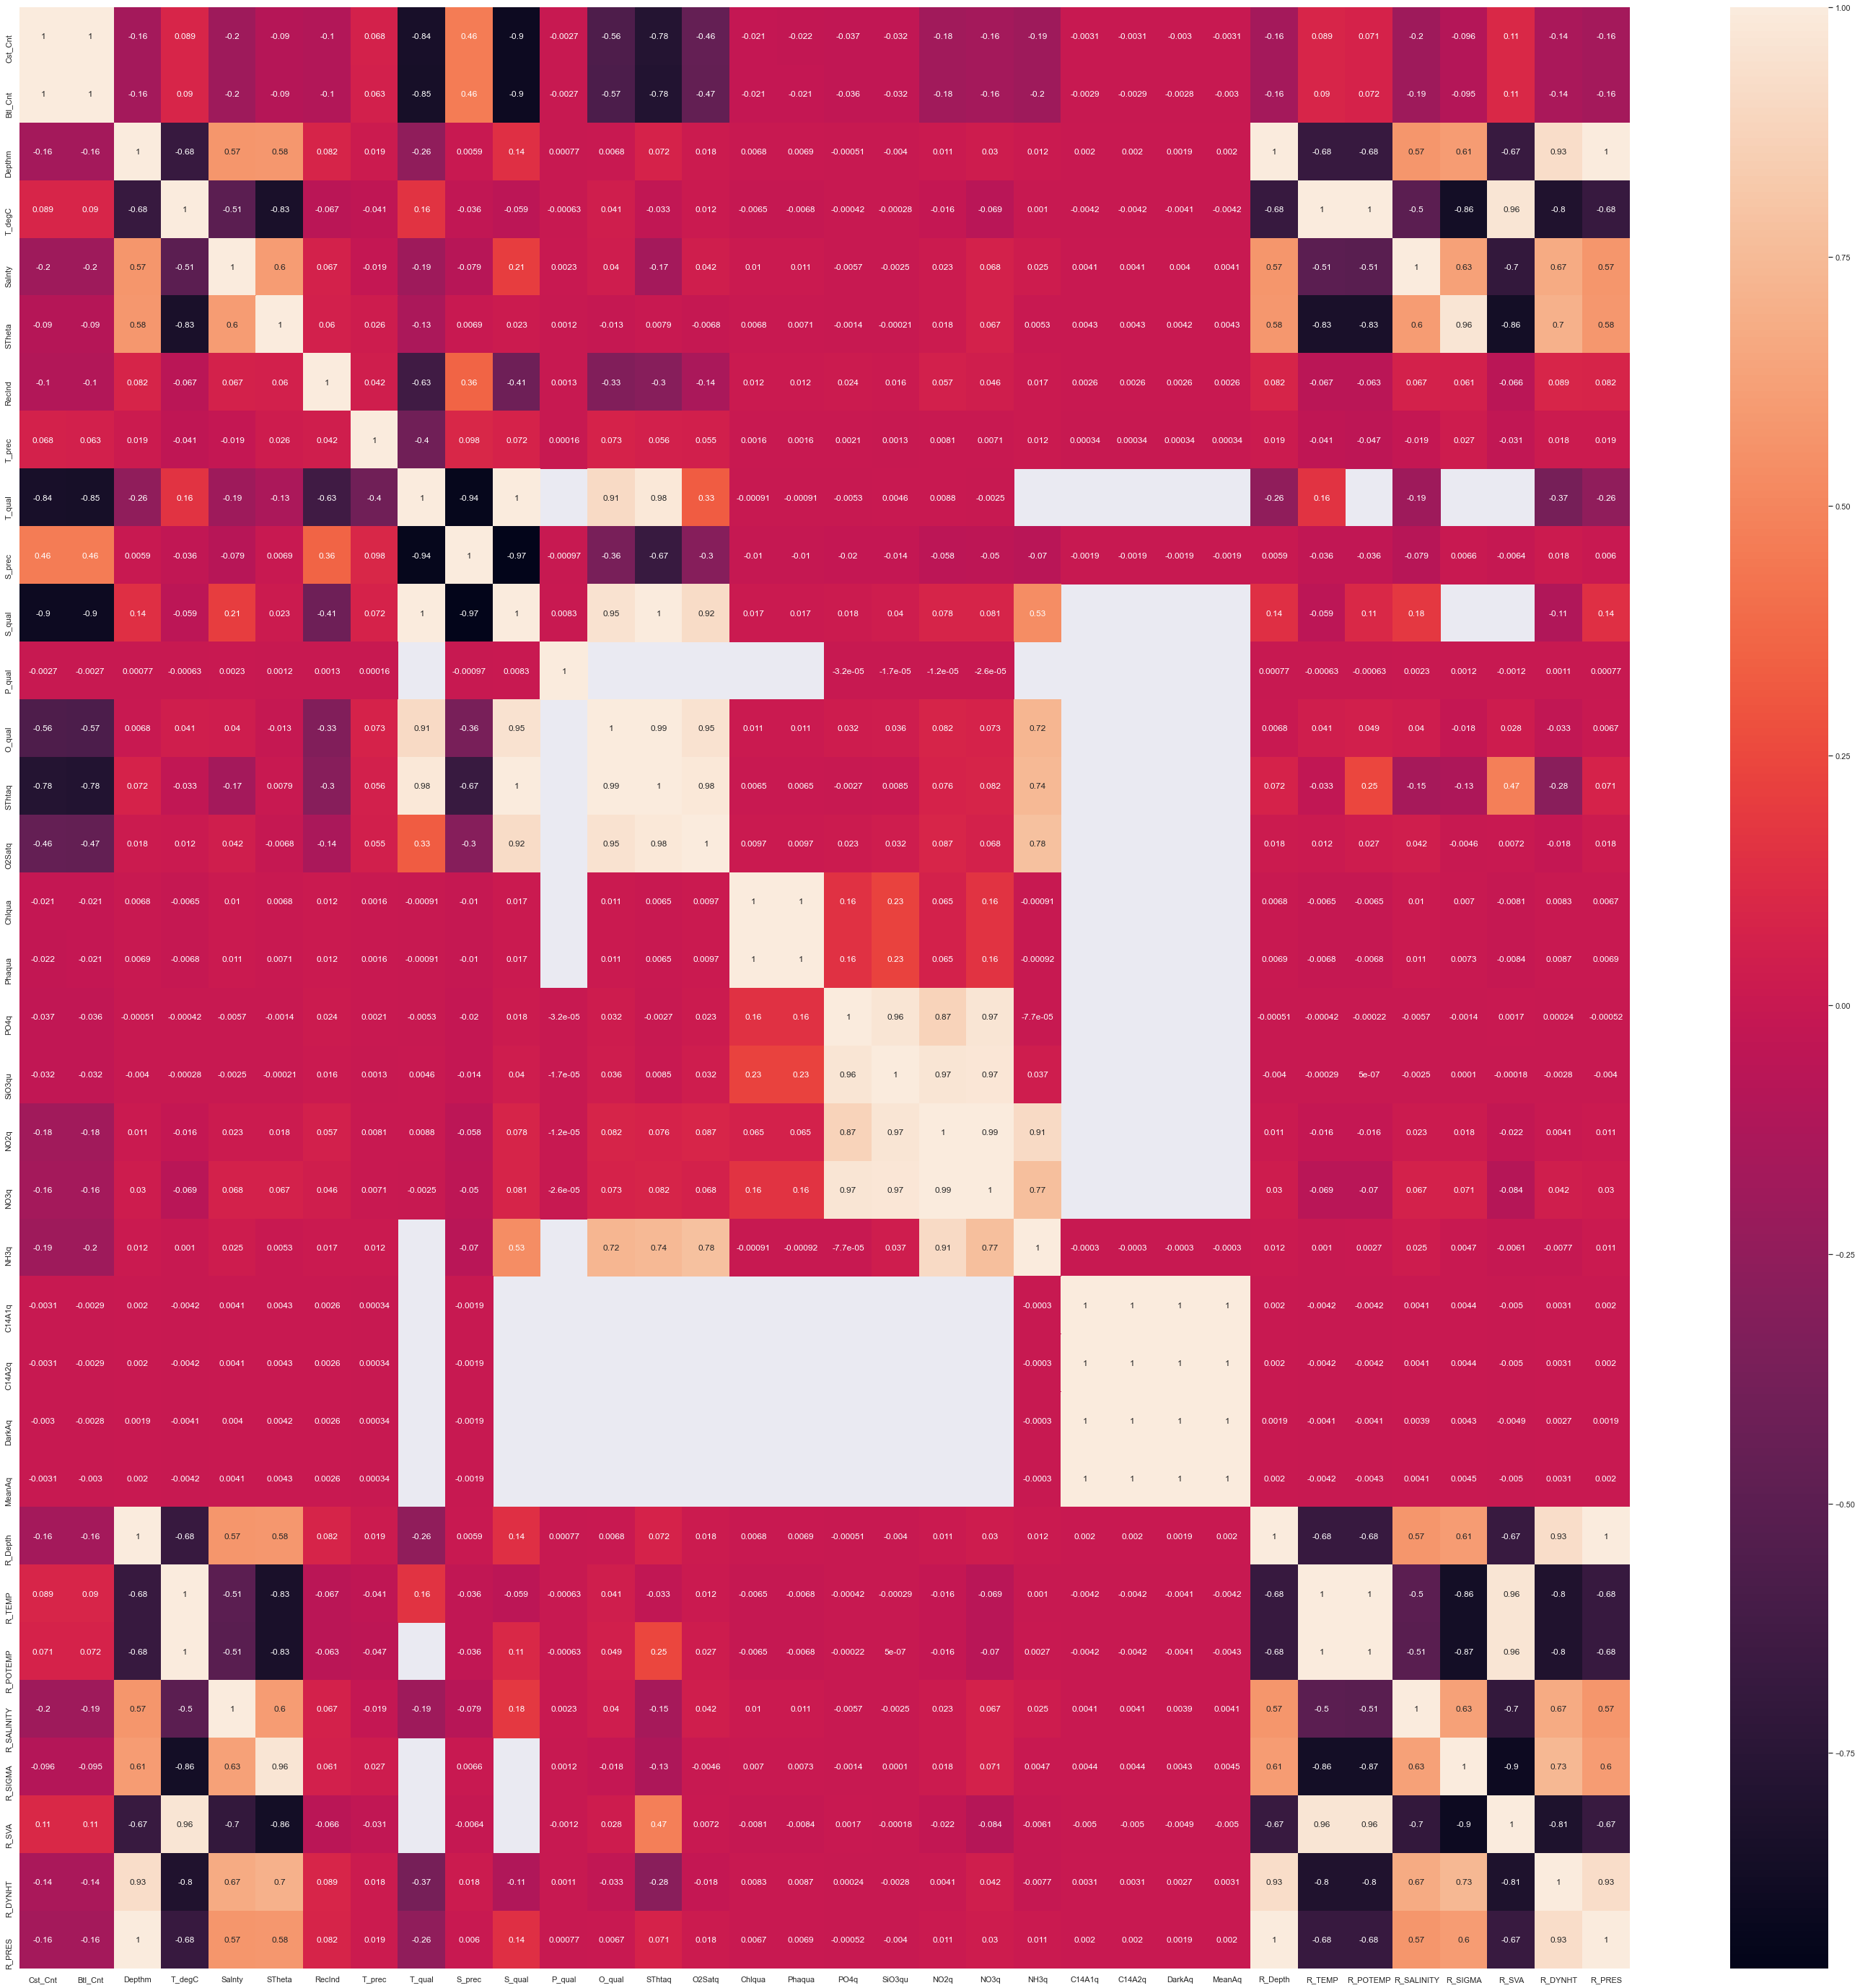

In [26]:
#we can plot a heatmap to see which feature are highly correlated and pick those for the further analysis on their relationship
sns.set(rc={'figure.figsize':(50,50)})
correlation = bottle_df1.corr()
sns.heatmap(correlation, annot=True)
plt.show()

In [14]:
correlation.head()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,STheta,RecInd,T_prec,T_qual,S_prec,...,DarkAq,MeanAq,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_PRES
Cst_Cnt,1.000000,0.999345,-0.162222,0.089329,-0.198024,-0.089902,-0.100142,0.067977,-0.840300,0.458220,...,-0.002954,-0.003116,-0.162220,0.089337,0.071169,-0.197496,-0.095794,0.107822,-0.138037,-0.161961
Btl_Cnt,0.999345,1.000000,-0.161617,0.090118,-0.195207,-0.089521,-0.100828,0.062864,-0.847992,0.456784,...,-0.002821,-0.003000,-0.161614,0.090126,0.072048,-0.194687,-0.095405,0.107463,-0.138205,-0.161348
Depthm,-0.162222,-0.161617,1.000000,-0.681201,0.572630,0.582710,0.082316,0.019422,-0.257070,0.005934,...,0.001863,0.002004,1.000000,-0.681202,-0.679035,0.571185,0.606262,-0.669232,0.927118,0.999994
T_degC,0.089329,0.090118,-0.681201,1.000000,-0.505266,-0.829155,-0.066507,-0.041076,0.162308,-0.036218,...,-0.004066,-0.004214,-0.681200,1.000000,0.999954,-0.503959,-0.862161,0.964171,-0.799025,-0.679852
Salnty,-0.198024,-0.195207,0.572630,-0.505266,1.000000,0.603470,0.067320,-0.019075,-0.191714,-0.079280,...,0.003950,0.004141,0.572629,-0.505268,-0.507023,0.997428,0.628311,-0.698367,0.669824,0.571405


## 3.
Perform multiple linear regression on the dataset. Be sure to display the final resulting equation with the coefficients and intercept in markdown.

In [27]:
#multiple linear regression - needs to use variables that are uncorrelated with each other
X = df_clean[['Depthm','T_prec']]
y=df_clean['T_degC']

In [28]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X,y)

LinearRegression()

In [32]:
y_pred = regression.predict(X)
accuracy_score = regression.score(X,y)
print(accuracy_score)

0.4648111001092142


In [33]:
regression.coef_

array([-0.00911603, -0.79609166])

In [34]:
#X1= -0.009 X2 - 0.796X3 --> resulting equation

## 4.
Which regression approach had the “best” performance? Be sure to compare it to what you did last week.

In [ ]:
#Compared to the linear regression from last week, this week's regression has higher accuracy score, 46% when last week's
#regression's score had 25% accuracy.

## 5.
Work with the diabetes dataset to perform multiple logistic regression. Look at the documentation for logistic regression in statsmodel and/or sklearn and see if you can tune the model performance based on available parameters. Please note: data scientists need to constantly learn new approaches to optimizing models. This is one way of doing that. 

In [3]:
diabetes_df = pd.read_csv("diabetes.csv")
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
from statsmodels.formula.api import logit
#no interaction
age_blood=logit("Outcome ~ Age + BloodPressure", data=diabetes_df).fit()

Optimization terminated successfully.
         Current function value: 0.618921
         Iterations 5


In [5]:
#with interaction
age_blood_int=logit("Outcome ~ Age * Glucose", data=diabetes_df).fit()

Optimization terminated successfully.
         Current function value: 0.513197
         Iterations 6


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=30, stratify=y)

#Standardize
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [7]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
sample_pred=[[6,148,72,35,0,33.6,0.627,50]]
y_predicted = clf.predict(X_test)

In [8]:
clf.score(X,y)

0.3502604166666667

In [9]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       100
           1       0.71      0.63      0.67        54

    accuracy                           0.78       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.78      0.78      0.78       154



In [10]:
conf_matrix = confusion_matrix(y_test, y_predicted)
conf_matrix

array([[86, 14],
       [20, 34]])

## 6.
What are the other ways to assess the performance of the model besides accuracy? What approach makes the most sense with the diabetes dataset? Why?

We can use confusion matrix to asses the performance of the model. 
For a good model, the principle diagonal elements of the confusion matrix 
should be high values and off-diagonal elements should be low values.
Also we can use F1 score to assess the accuracy. It tells us precision and recall score. The highest score you can get is 1.0
It made sense to use the confusion matrix in the diabetes dataset.

## 7. 
Is the KNN model or the multiple logistic regression model more performant for the diabetes dataset? How can you tell? 

The score on KNN model that we made the previous weel looks to be more performant because the model's accuracy score is higher.

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [14]:
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

#split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=35)

#Standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

knn = KNeighborsClassifier(n_neighbors=14)

knn.fit(X_train,y_train)
y_predicted = knn.predict(X_test)
print(y_predicted)

[0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0
 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1
 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1
 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0
 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 1 1 0 0 1 0 0 1 0 0 0 0 0]


In [15]:
print(knn.score(X_test, y_test))

0.7083333333333334


In [16]:
diabetes_pred_df = pd.DataFrame(X_test, columns = diabetes_df.columns[0:8])
diabetes_pred_df['Predicted_Outcome']= y_predicted.tolist()
diabetes_pred_df['Actual_Outcome'] = y_test.tolist()

diabetes_pred_df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Predicted_Outcome,Actual_Outcome
379,-1.137137,-0.654167,-3.513370,-1.250081,-0.653471,-0.914670,-0.658720,-0.977097,0,0
380,0.022652,0.335873,-3.513370,-1.250081,-0.653471,0.119486,-0.499782,-0.893644,0,1
381,-0.267295,0.245869,-0.255207,0.533050,0.303145,-0.731402,-0.769004,-0.476378,0,1
382,-0.267295,-1.404197,-0.051572,0.471562,-0.279143,-0.299413,-0.528975,-0.893644,0,0
383,-0.267295,-0.624166,-0.051572,0.164126,0.020319,-0.050692,1.598852,-0.476378,0,0


In [17]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
confusion_matrix(y_test, y_predicted)

array([[224,  28],
       [ 84,  48]])

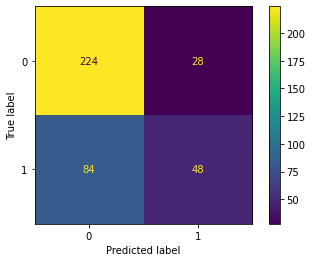

In [18]:
plot_confusion_matrix(knn, X_test, y_test)